# ZUBER

## Descripción del proyecto

Zuber es una nueva empresa de viajes compartidos que se está lanzando en Chicago. 

Tengo disponible una base de datos que me ha sido encomendada para analizar información de los competidores y probar una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

Mi tarea principal es encontrar patrones en la información disponible. 

## Objetivo

Comprender las preferencias de los pasajeros y la relación que hay entre ellas y el impacto de los factores externos en los viajes.

## Carga de datos y librerías

In [3373]:
# Cargaré todas las librerías que necesito.
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial

In [3374]:
# Cargaré los datos del primer dataset.
company_df = pd.read_csv('/Users/brisna/github_projects/tripleten/chicago_taxis_sprint_8/moved_project_sql_result_01.csv')

In [3375]:
# Cargaré los datos del segundo dataset.
trips_df = pd.read_csv('/Users/brisna/github_projects/tripleten/chicago_taxis_sprint_8/moved_project_sql_result_04.csv')

## Preparación de datos

### Dataset 1 - Company

In [3376]:
# Vere las primeras 10 filas del dataframe.
company_df.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [3377]:
company_df.columns

Index(['company_name', 'trips_amount'], dtype='object')

La descripción de los datos es la siguiente:

* company_name: nombre de la empresa de taxis.

* trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

In [3378]:
# Veré una descripción general de los datos.
company_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [3379]:
# Revisaré el tipo de datos que tengo y los posibles datos ausentes.
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3380]:
# Verificaré si hay datos duplicados.
duplicated_rows_company = company_df.duplicated().sum()
duplicated_rows_company

np.int64(0)

COMENTARIOS PRELIMINARES - DATASET 1 (COMPANY)

Puedo observar:

* Un dataset de 64 compañias y su número de viajes para los días 15 y 16 de noviembre de 2017.
  
* En promedio, las compañias realizaron 2,145 viajes aunque hay quien realizó 19,558 viajes y quien solo tiene 2 viajes registrados.

* Hay una desviación estándar alta, lo que indica gran variabilidad en el número de viajes; es decir, puede que algunas compañías tengan muchos más viajes que otras.

* No hallé datos ausentes ni duplicados.


In [3381]:
# Revisaré las 10 compañias con más viajes.
top_10_companias = company_df.sort_values('trips_amount', ascending=False).head(10)
top_10_companias

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


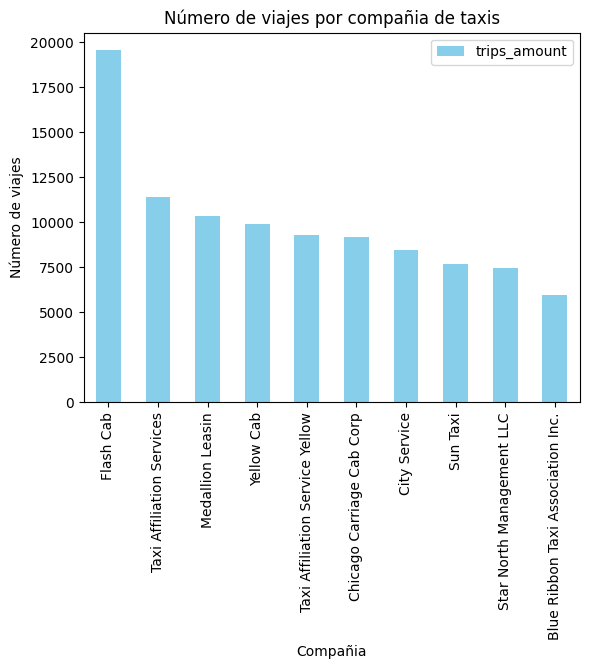

In [3382]:
# Realizaré un gráfico para revisar las compañias y el número de viajes.
top_10_companias.set_index('company_name', inplace=True)
top_10_companias.plot(
    kind='bar', 
    color='skyblue')
plt.xticks(rotation=90) 
plt.title('Número de viajes por compañia de taxis')
plt.xlabel('Compañia')
plt.ylabel('Número de viajes')
plt.show()

COMENTARIOS TOP 10 - DATASET 1 (COMPANY)

* La compañia que registró más viajes es Flash Cab.

* Considerando la cantidad de viajes entre Flash Cab y Blue Ribbon Taxi Association Inc, observo una gran diferencia en viajes aún cuando ambas estan dentro de las 10 compañias con más viajes registrados. 
  
* Esto puede ser derivado de la calidad del servicio como el estado físico de las unidades en que viajan o la atención del conductor e incluso la tarifa o la cantidad de vehículos que tienen disponibles.

### Dataset 2 - Trips

In [3383]:
# Vere las primeras 10 filas del dataframe.
trips_df.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [3384]:
trips_df.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

La descripción de los datos es la siguiente:

* dropoff_location_name: barrios de Chicago donde finalizaron los viajes.

* average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

In [3385]:
# Veré una descripción general de los datos.
trips_df.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [3386]:
# Revisaré el tipo de datos que tengo y los posibles datos ausentes.
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [3387]:
# Verificaré si hay datos duplicados.
duplicated_rows_trips = trips_df.duplicated().sum()
duplicated_rows_trips

np.int64(0)

COMENTARIOS PRELIMINARES - DATASET 2 (TRIPS)

Puedo observar:

* Un dataset de 94 barrios en Chicago y el promedio de viajes que hubo hacía cada uno de ellos.
  
* En promedio, hay 599 viajes realizados por barrio aunque hay barrios más concurridos que alcanzan un promedio de 10,727 viajes y otros que solo tienen menos de 2 viajes registrados en promedio.

* Hay una desviación estándar alta, lo que indica destinos más visitados que otros, quizá se trate de lugares turísticos o concurridos (con oficinas, colegios, supermercados, parques, aeropuertos, etc).
  
* Observo que 'average_trips' tiene datos int así que los cambiare a float.
  
* No hallé datos ausentes ni duplicados.

In [3388]:
# Cambiaré el tipo de datos de 'average_trips' de int a float y la redondearé a dos decimales.
trips_df['average_trips'] = trips_df['average_trips'].astype(float).round(2)
trips_df

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
...,...,...
89,Mount Greenwood,3.14
90,Hegewisch,3.12
91,Burnside,2.33
92,East Side,1.96


In [3389]:
# Identificaré los 10 principales barrios en términos de finalización del recorrido.
top_10_barrios = trips_df.sort_values('average_trips', ascending=False).head(10)
top_10_barrios

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


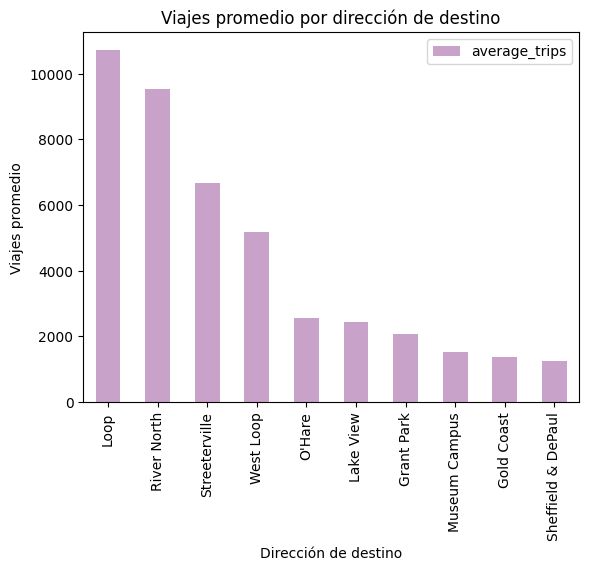

In [3390]:
# Haré un gráfico para observar los viajes promedio por dirección de destino.
top_10_barrios.set_index('dropoff_location_name', inplace=True)
top_10_barrios.plot(
    kind='bar', 
    color='#C8A2C8')
plt.title('Viajes promedio por dirección de destino')
plt.xlabel('Dirección de destino')
plt.ylabel('Viajes promedio')
plt.show()

COMENTARIOS TOP 10 - DATASET 2 (TRIPS)

* Loop es el destino más popular de acuerdo a los datos obtenidos con un promedio de 10,727 viajes. Vale la pena recordar que Loop es considerado el distrito financiero de Chicago por lo que todos los días atrae trabajadores al punto.
  
* River North ocupa el segundo lugar con un promedio de 9,523 viajes. Este es un barrio famoso por sus restaurantes, centros de arte y bares lo cuál lo hace muy visitado por locales, vacacionistas y extranjeros.
  
* O'Hare ocupa el quinto lugar con un promedio de 2546 viajes, esto principalmente por el aeropuerto internacional que se encuentra allí.

## Prueba de hipótesis

### Carga de datos - Dataset 3 (Trips Loop - O'Hare)

In [3391]:
# Cargaré los datos del tercer dataset.
trips_loop_ohare_df = pd.read_csv('/Users/brisna/github_projects/tripleten/chicago_taxis_sprint_8/moved_project_sql_result_07.csv')
trips_loop_ohare_df.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [3392]:
trips_loop_ohare_df.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds'], dtype='object')

La descripción de los datos es la siguiente::

* start_ts: fecha y hora de la recogida.

* weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje.

* duration_seconds: duración del viaje en segundos.

In [3393]:
# Veré una descripción general de los datos.
trips_loop_ohare_df.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [3394]:
# Revisaré el tipo de datos que tengo y los posibles datos ausentes.
trips_loop_ohare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [3395]:
# Verificaré si hay datos duplicados.
duplicated_rows_trips_loop_ohare = trips_loop_ohare_df.duplicated().sum()
duplicated_rows_trips_loop_ohare

np.int64(197)

In [3396]:
# Observaré las filas duplicadas.
duplicated_rows_trips_loop_ohare = trips_loop_ohare_df[trips_loop_ohare_df.duplicated()]
duplicated_rows_trips_loop_ohare

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


COMENTARIOS PRELIMINARES - DATASET 3 (TRIPS LOOP - O'HARE)

Puedo observar:

* Un registro de 1,068 viajes hechos de Loop al aeropuerto internacional O'Hare. Incluye las condiciones climáticas de cada viaje y la duración del viaje en segundos. Valdría la pena hacer la conversión a minutos.
  
*  En promedio, los viajes duran 2,072 segundos (equivalente a 35 minutos). El viaje más largo que se registró es de 7,440 segundos (124 minutos, es decir, poco más de 2 horas). Hay viajes registrados con 0 segundos que debo revisar.
  
*  Hay una variabilidad alta en la desviación estandar que podría deberse a las condiciones climáticas o bien, a la demanda del servicio en ciertos días lo que genere mayor tránsito vial.
  
*  No hallé datos ausentes pero sí hay 197 duplicados que debo revisar.

In [3397]:
# Eliminaré las filas duplicadas.
trips_loop_ohare_df = trips_loop_ohare_df.drop_duplicates()
trips_loop_ohare_df

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


In [3398]:
# Cambiaré el tipo de datos de 'start_ts' de object a datetime.
trips_loop_ohare_df['start_ts'] = pd.to_datetime(trips_loop_ohare_df['start_ts'], errors='coerce')

In [3399]:
# Generaré una nueva columna con la conversión de segundos a minutos. Redondearé a 2 decimales.
trips_loop_ohare_df['duration_minutes'] = (trips_loop_ohare_df['duration_seconds'] / 60).round(2)
trips_loop_ohare_df

,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,40.17
1,2017-11-25 14:00:00,Good,1920.0,32.00
2,2017-11-25 12:00:00,Good,1543.0,25.72
3,2017-11-04 10:00:00,Good,2512.0,41.87
4,2017-11-11 07:00:00,Good,1440.0,24.00
...,...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0,45.00
1061,2017-11-18 16:00:00,Bad,2186.0,36.43
1063,2017-11-25 11:00:00,Good,0.0,0.00
1064,2017-11-11 10:00:00,Good,1318.0,21.97


In [3400]:
# Revisaré los viajes con duración cero (0).
trips_zero = trips_loop_ohare_df[trips_loop_ohare_df['duration_minutes'] == 0]
trips_zero

,start_ts,weather_conditions,duration_seconds,duration_minutes
163,2017-11-11 09:00:00,Good,0.0,0.0
168,2017-11-11 07:00:00,Good,0.0,0.0
204,2017-11-18 19:00:00,Good,0.0,0.0
552,2017-11-04 01:00:00,Good,0.0,0.0
801,2017-11-04 09:00:00,Good,0.0,0.0
1063,2017-11-25 11:00:00,Good,0.0,0.0


In [3401]:
# Eliminaré los 6 viajes que tienen cero en duración.
trips_loop_ohare_df = trips_loop_ohare_df[trips_loop_ohare_df['duration_minutes'] != 0]
trips_loop_ohare_df

,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,40.17
1,2017-11-25 14:00:00,Good,1920.0,32.00
2,2017-11-25 12:00:00,Good,1543.0,25.72
3,2017-11-04 10:00:00,Good,2512.0,41.87
4,2017-11-11 07:00:00,Good,1440.0,24.00
...,...,...,...,...
1059,2017-11-11 10:00:00,Good,1303.0,21.72
1060,2017-11-04 14:00:00,Good,2700.0,45.00
1061,2017-11-18 16:00:00,Bad,2186.0,36.43
1064,2017-11-11 10:00:00,Good,1318.0,21.97


Text(0, 0.5, 'Condición climatológica')

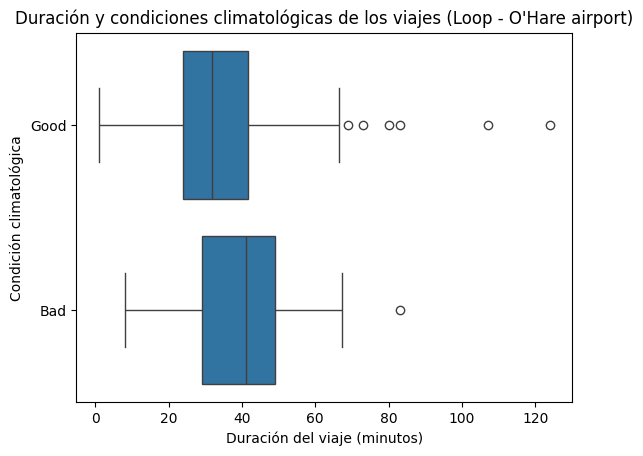

In [3402]:
# Haré un gráfico para visualizar los datos.
sns.boxplot(x='duration_minutes', y='weather_conditions', data=trips_loop_ohare_df)
plt.title("Duración y condiciones climatológicas de los viajes (Loop - O'Hare airport)")
plt.xlabel('Duración del viaje (minutos)')
plt.ylabel('Condición climatológica')

* Observo algunos datos atípicos a partir de los 70 minutos de duración y en adelante sobretodo cuando las condiciones climatológicas son buenas.

* Eliminaré esos valores atípicos para que no afecten el análisis que estoy realizando. Para ello, utilizaré el Método de los cuartiles (IQR - Rango Intercuartílico).

In [3403]:
# Eliminaré los valores atípicos a través del Método IQR.
Q1 = trips_loop_ohare_df['duration_minutes'].quantile(0.25)
Q3 = trips_loop_ohare_df['duration_minutes'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

trips_loop_ohare_df_clean = trips_loop_ohare_df[(trips_loop_ohare_df['duration_minutes'] >= lower_limit) & (trips_loop_ohare_df['duration_minutes'] <= upper_limit)]
trips_loop_ohare_df_clean

/Users/brisna/github_projects/tripleten/.venv/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,40.17
1,2017-11-25 14:00:00,Good,1920.0,32.00
2,2017-11-25 12:00:00,Good,1543.0,25.72
3,2017-11-04 10:00:00,Good,2512.0,41.87
4,2017-11-11 07:00:00,Good,1440.0,24.00
...,...,...,...,...
1059,2017-11-11 10:00:00,Good,1303.0,21.72
1060,2017-11-04 14:00:00,Good,2700.0,45.00
1061,2017-11-18 16:00:00,Bad,2186.0,36.43
1064,2017-11-11 10:00:00,Good,1318.0,21.97


<Axes: xlabel='duration_minutes', ylabel='weather_conditions'>

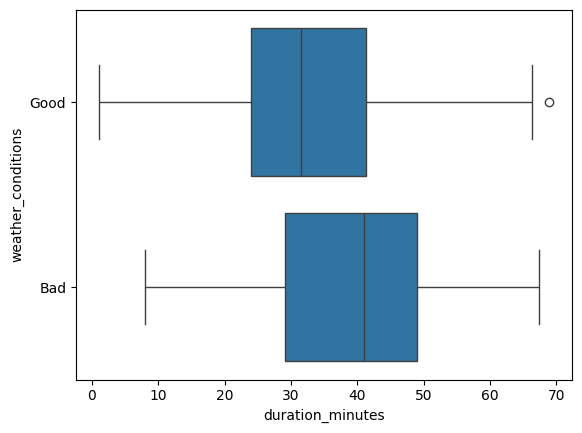

In [3404]:
# Realizaré nuevamente un gráfico para visualizar los datos.
sns.boxplot(x='duration_minutes', y='weather_conditions', data=trips_loop_ohare_df_clean)

In [3405]:
# Calcularé algunas estadísticas de la duración de los viajes con buena y mala condición climática.
trips_stats_by_weather_conditions = trips_loop_ohare_df_clean.groupby('weather_conditions')['duration_minutes'].agg(['mean', 'var', 'median', 'std']).reset_index()
trips_stats_by_weather_conditions

,weather_conditions,mean,var,median,std
0,Bad,39.862245,145.310805,41.0,12.054493
1,Good,33.738230,131.556068,31.6,11.469789


* Los viajes en condiciones meteorológicas malas tienen una duración promedio de 39.86 minutos. Los viajes en condiciones buenas tienen una duración promedio de 33.74 minutos. Esto representa una mayor duración en los viajes cuando el clima es malo.

* La varianza para los viajes en clima malo es 145.31 y para los viajes en clima bueno es de 131.56; ligeramente menor. Esto podría indicar que los tiempos de viaje tienden a ser similares cuando las condiciones climáticas son buenas. Cuando son malas, al parecer hay una mayor dispersión en los tiempos de viaje.

* La mediana indica que cuando el clima es malo, la mitad de los viajes duran menos de 41 minutos y cuando el clima es bueno la mitad de los viajes duran menos de 32 minutos. De acuerdo a esta medida, los viajes tienden a ser más rápidos en clima bueno.
  
* La desviación estándar en clima malo es 12.05 minutos y en clima bueno es 11.47 minutos, lo que indica una mayor dispersión de los tiempos de viaje en condiciones climáticas malas.

CONCLUSIÓN:
Hasta el momento, los datos indican que los viajes en clima malo tienden a durar más y tienen una mayor variabilidad en comparación con los viajes en clima bueno.


### HIPÓTESIS: "La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

* Hipótesis Nula (H0) = La duración promedio de los viajes desde Loop hasta el aeropuerto internacional O'Hare es igual durante los sábados lluviosos en comparación con los sábados sin lluvia.

* Hipótesis Alternativa (H1) = La duración promedio de los viajes desde Loop hasta el aeropuerto internacional O'Hare es diferente durante los sábados lluviosos en comparación con los sábados sin lluvia.

In [3406]:
# Filtraré los datos para que observe sólo los viajes de los sábados.
trips_loop_ohare_saturday = trips_loop_ohare_df_clean[trips_loop_ohare_df_clean['start_ts'].dt.weekday == 5]
trips_loop_ohare_saturday


,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,40.17
1,2017-11-25 14:00:00,Good,1920.0,32.00
2,2017-11-25 12:00:00,Good,1543.0,25.72
3,2017-11-04 10:00:00,Good,2512.0,41.87
4,2017-11-11 07:00:00,Good,1440.0,24.00
...,...,...,...,...
1059,2017-11-11 10:00:00,Good,1303.0,21.72
1060,2017-11-04 14:00:00,Good,2700.0,45.00
1061,2017-11-18 16:00:00,Bad,2186.0,36.43
1064,2017-11-11 10:00:00,Good,1318.0,21.97


In [3407]:
# Dividiré los días lluviosos de los no lluviosos.
rainy_saturdays = trips_loop_ohare_saturday[trips_loop_ohare_saturday['weather_conditions'] == 'Bad']['duration_minutes']
non_rainy_saturdays = trips_loop_ohare_saturday[trips_loop_ohare_saturday['weather_conditions'] == 'Good']['duration_minutes']
rainy_saturdays.count(), non_rainy_saturdays.count()

(np.int64(147), np.int64(712))

En este caso:

* Como estoy comparando la media de días lluviosos y no lluviosos, usaré la Prueba T de dos muestras independientes (t-test) para ver si existe una diferencia significativa en la duración promedio de los viajes en ambas condiciones climáticas.

* Utilizaré un nivel de significancia típico de 0.05

In [3408]:
# Realizaré la prueba de Levene.
levene_platform = st.levene(rainy_saturdays, non_rainy_saturdays)
print(f"T-statistic: {levene_platform.statistic}")
print(f"P-value: {levene_platform.pvalue}")

T-statistic: 0.2548124757728791
P-value: 0.6138364370719522


Dado que el valor p-value (0.8428) es mucho mayor que el nivel de significancia que decidí utilizar (0.05), no hay evidencia suficiente para rechazar la hipótesis nula de que las varianzas de ambos grupos son iguales. 

Por lo tanto, asumiré que las varianzas son iguales al realizar la Prueba T.

In [3409]:
# Realizaré la Prueba T.
t_stat, p_value = st.ttest_ind(rainy_saturdays, non_rainy_saturdays, equal_var=True)
print(f'Prueba t: {t_stat}')
print(f'p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. La duración promedio de los viajes cambia durante los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la duración promedio de los viajes cambia durante los sábados lluviosos.")


Prueba t: 5.841832009994245
p-value: 7.328655117158223e-09
Rechazamos la hipótesis nula. La duración promedio de los viajes cambia durante los sábados lluviosos.


## Conclusión General

Durante este análisis pude estudiar los datos de 3 datasets, enlistados a continuación:

1. Company: 
   
   * Observé que algunas compañías, como Flash Cab, dominan el mercado con un número significativamente mayor de viajes (19,558). 
  
   * Hay una  desviación estándar alta , la cual indica una gran variabilidad en el número de viajes realizados por cada compañía, lo cual sugiere que aspectos como la calidad del servicio, la cantidad de vehículos disponibles, la atención del conductor y las tarifas pudieran jugar un papel fundamental en el éxito de estas empresas.

2. Trips: 
   
   * Los destinos más concurridos, como Loop (10,727 viajes en promedio) y River North (9,523 viajes en promedio), son áreas estratégicas para este negocio. Estos barrios tienen una alta demanda de viajes debido a su actividad económica, turística o de entretenimiento lo cual es importante saber ya que Zuber puede enfocar sus recursos en zonas como estas.

3. Trips Loop - O'Hare Airport:
   * En promedio, los viajes durante el mal tiempo tienden a durar más (39.86 minutos frente a 33.74 minutos en condiciones buenas). 

   * Los tiempos de viaje en clima malo también mostraron mayor dispersión, lo que sugiere una mayor variabilidad.



La prueba estadística aplicada a los sábados lluviosos arrojó los siguientes resultados: 

   * La Prueba T confirmó que la duración promedio de los viajes varía de manera significativa en días lluviosos.



Recomendaciones generales:

- Priorizar la cobertura en zonas como Loop y River North, debido a la alta demanda.
   
- Ajustar el tiempo y precio estimado de viaje en función del clima, ya que los viajes tienden a ser más largos durante condiciones climáticas desfavorables.
   
- Ofrecer nuevos servicios diferenciados en términos tarifas y tipos de vehículos según el área, tales como:
    * Autos compartidos para oficinistas.
    * Vehículos premium para zonas residenciales.
    * Servicio turístico para extranjeros con información de zonas turísticas, horarios, apoyo de IA para comunicarse en otro idioma.